In [269]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

$
\newcommand{\xb}{\mathbf{x}}
$


In [270]:
lines = open("points_file2.txt").readlines()
points = np.array([list(map(float, line[:-1].split())) for line in lines])
print(points.shape)

(305, 3)


In [271]:
def distance_pts(pt1, pt2):
    return np.sqrt(np.sum(np.square(pt1 - pt2)))

init the memo matrix.  
* diagonals are zero
* we need to worry about the upper triangle
* compute (i, i+1) as the distance between the points right away

In [272]:
n = points.shape[0]
print(points.shape)
memo = np.zeros((n,n))
for ix in range(n-1):
    memo[ix, ix+1] = distance_pts(points[ix,:], points[ix+1,:])

(305, 3)


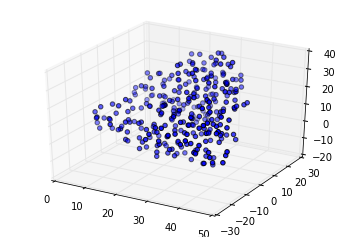

In [273]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2])
plt.show()

$$
 t=-\frac{(\xb_1-\xb_0)^T (\xb_2-\xb_1)}{|\xb_2-\xb_1|^2} 
 $$
 
$$
d=\frac{|\xb_1-\xb_0|^2|\xb_2-\xb_1|^2-[(\xb_1-\xb_0)·(\xb_2-\xb_1)]^2}{|\xb_2-\xb_1|^2}
$$

In [274]:
def distance_pt_line(pt1, pt2, pt0):
    num_1 = np.sum(np.square(pt1-pt0)) * np.sum(np.square(pt2-pt1))
    num_2 = (np.sum((pt1-pt0)*(pt2-pt1)))**2
    den_1 = np.sum(np.square(pt2-pt1))
    #print(num_1, num_2, den_1)
    return math.sqrt((num_1 - num_2)/den_1)
#distance_pt_line(points[0,:], points[1,:], points[4,:])
#distances = np.zeros((n,n))

In [275]:
def compute_cost(points, memo, j, k, verbose=False, force=False):
    if(not(force) and not(np.isnan(memo[j,k]))):
        return memo[j, k]
    if verbose:
        print("compute cost {0},{1}".format(j,k))
    
    p_start = points[j, :]
    p_end = points[k, :]
    memo[j, k] = 2*distance_pts(points[j, :], points[k, :])
    for i in range(j+1, k):
        memo[j, k] += distance_pt_line(p_start, p_end, points[i,:])

    return memo[j, k]

In [276]:
distance_pt_line(np.array([0,0,0]), np.array([1,0,0]), np.array([0,1,0]))

1.0

In [277]:
memo_tmp = np.full((3,3), np.nan)
pts_tmp = np.array([[0,0,0],[0,1,0],[1,0,0]])
compute_cost(pts_tmp, memo_tmp, 0, 2)

3.0

In [278]:
memo_tmp = np.full((4,4), np.nan)
compute_cost(points, memo_tmp, 0, 3)

21.711783377670738

In [279]:
def flatten(list1):
    return [item for sublist in list1 for item in sublist]
def compute_best(points, memo_cost, memo_splits, j=0, k=n-1, verbose=False):
    if verbose:
        print('compute_best: {0},{1}'.format(j, k))
    if(not(np.isnan(memo_cost[j, k])) and (memo_splits[j][k] is not None)):
        return (memo_cost[j, k], memo_splits[j][k])
    
    min_cost = compute_cost(points, memo_cost, j, k, verbose)    
    best_splits = [j,k]

    if((k-j)==1):
        if verbose:
            print('k-j==1')
        memo_cost[j,k] = min_cost
        memo_splits[j][k] = best_splits
        return (memo_cost[j,k], memo_splits[j][k])
    if(k==j):
        if verbose:
            print('k==j')
        return (0, [])
    if(k<j):
        1/0
    
    for i in range(j+1,k):
        if verbose:
            print('compute-best::split::{0}'.format(i))
        val1, splits1 = compute_best(points, memo_cost, memo_splits, j, i, verbose)
        if val1 > min_cost:
            continue
        val2, splits2 = compute_best(points, memo_cost, memo_splits, i, k, verbose)
        current_cost = val1 + val2
        if(current_cost < min_cost):
            min_cost = current_cost
            best_splits = flatten([splits1, splits2[1:]])
    memo_cost[j,k] = min_cost
    memo_splits[j][k] = best_splits

    return (memo_cost[j,k], memo_splits[j][k])

memo_cost = np.full((n,n), np.nan)
print(np.isnan(memo_cost[1,3]))
memo_splits = [[None for ix in range(n)] for jx in range(n)]
compute_best(points, memo_cost, memo_splits, 0, n-1, verbose=False)

True


(1817.4829172246814,
 [0,
  1,
  6,
  11,
  15,
  17,
  18,
  19,
  27,
  30,
  35,
  41,
  42,
  59,
  60,
  67,
  75,
  77,
  84,
  88,
  106,
  107,
  112,
  121,
  124,
  126,
  128,
  131,
  133,
  134,
  135,
  137,
  152,
  153,
  155,
  157,
  159,
  160,
  189,
  191,
  193,
  199,
  221,
  229,
  233,
  238,
  239,
  241,
  242,
  243,
  244,
  246,
  247,
  250,
  252,
  261,
  262,
  268,
  277,
  283,
  284,
  290,
  299,
  304])

In [280]:
print(memo_cost[0,:])

[           nan     7.68349244    14.93093874    21.41149195    25.24389841
    32.14450302    37.4398485     44.6561614     50.59017737    55.76482497
    61.57791042    68.91345577    76.41644211    83.92285909    89.72933676
    93.01310155   100.71801557   107.94075835   115.47414484   123.10496394
   130.67856297   137.79560295   140.66782859   148.31714333   154.73923929
   162.40178716   168.35134261   163.8223249    171.36846908   177.59198995
   182.13288716   187.08559579   192.48109766   197.83446584   204.19557664
   209.72797454   213.86940137   220.46016749   225.87972979   231.73544727
   239.33251434   241.73370739   249.43412972   256.13705609   263.66316451
   271.14958395   278.74233892   286.12065382   293.36934131   297.17311907
   304.1826185    311.80144413   316.45927075   323.95620159   331.38143301
   339.02057747   342.29304943   346.62663251   351.83360348   344.07015465
   351.81260827   359.39472565   365.40311626   372.73220046   378.7925397
   381.819517